# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth (23.4 Deg. perpendicular to the ecliptic).
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 60 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import csv
import json
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [5]:
df = pd.DataFrame({
    "City": cities
})

df.to_csv(output_data_file)

data = pd.read_csv("../output_data/cities.csv")

data["City"] = cities
data["Cloudiness"] = ""
data["Country"] = ""
data["date"] = ""
data["humidity"] = ""
data["lat"] = ""
data["lon"] = ""
data["max temp"] = ""
data["wind speed"] = ""


column_names = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]

data = pd.DataFrame(data, columns=column_names)
data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,,,NaN,NaN,NaN,NaN,NaN,NaN
1,ushuaia,,,NaN,NaN,NaN,NaN,NaN,NaN
2,ponta do sol,,,NaN,NaN,NaN,NaN,NaN,NaN
3,taolanaro,,,NaN,NaN,NaN,NaN,NaN,NaN
4,hermanus,,,NaN,NaN,NaN,NaN,NaN,NaN


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "key": api_key,
    "units": units,
}

for index, row in data.iterrows():
    
    time.sleep(1)
    
    city = row['City']
    
    query_url = url + "appid=" + api_key + "&q=" + city
    
    print(f"Retrieving Results for Index {index}: {city}.")
    
    response = requests.get(query_url).json()
    
    try:
        data.loc[index, 'Cloudiness'] = str(response["clouds"]["all"])
        data.loc[index, 'Country'] = response["sys"]["country"]
        data.loc[index, "Date"] = response["dt"]
        data.loc[index, "Humidity"] = response["main"]["humidity"]


        data.loc[index, 'Lat'] = response["coord"]["lat"]
        data.loc[index, 'Lng'] = response["coord"]["lon"]
        data.loc[index, "Max Temp"] = response["main"]["temp_max"]
        data.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Retrieving Results for Index 0: rikitea.
------------
Retrieving Results for Index 1: ushuaia.
------------
Retrieving Results for Index 2: ponta do sol.
------------
Retrieving Results for Index 3: taolanaro.
Missing field/result... skipping.
------------
Retrieving Results for Index 4: hermanus.
------------
Retrieving Results for Index 5: cape town.
------------
Retrieving Results for Index 6: erzin.
------------
Retrieving Results for Index 7: belushya guba.
Missing field/result... skipping.
------------
Retrieving Results for Index 8: mar del plata.
------------
Retrieving Results for Index 9: albany.
------------
Retrieving Results for Index 10: carnarvon.
------------
Retrieving Results for Index 11: ilulissat.
------------
Retrieving Results for Index 12: rio grande.
------------
Retrieving Results for Index 13: kiunga.
------------
Retrieving Results for Index 14: daan.
------------
Retrieving Results for Index 15: temiscaming.
------------
Retrieving Results for Index 16: asw

Retrieving Results for Index 137: luau.
------------
Retrieving Results for Index 138: warqla.
Missing field/result... skipping.
------------
Retrieving Results for Index 139: khonuu.
Missing field/result... skipping.
------------
Retrieving Results for Index 140: nosy varika.
------------
Retrieving Results for Index 141: qaanaaq.
------------
Retrieving Results for Index 142: ende.
------------
Retrieving Results for Index 143: airai.
------------
Retrieving Results for Index 144: camacha.
------------
Retrieving Results for Index 145: puerto escondido.
------------
Retrieving Results for Index 146: marawi.
------------
Retrieving Results for Index 147: hithadhoo.
------------
Retrieving Results for Index 148: igrim.
------------
Retrieving Results for Index 149: punta arenas.
------------
Retrieving Results for Index 150: puerto ayora.
------------
Retrieving Results for Index 151: polovinnoye.
------------
Retrieving Results for Index 152: berlevag.
------------
Retrieving Results 

Retrieving Results for Index 269: kindu.
------------
Retrieving Results for Index 270: gangapur.
------------
Retrieving Results for Index 271: kaitangata.
------------
Retrieving Results for Index 272: aleppo.
------------
Retrieving Results for Index 273: bonavista.
------------
Retrieving Results for Index 274: inongo.
------------
Retrieving Results for Index 275: new norfolk.
------------
Retrieving Results for Index 276: varzea alegre.
Missing field/result... skipping.
------------
Retrieving Results for Index 277: imeni stepana razina.
------------
Retrieving Results for Index 278: hamilton.
------------
Retrieving Results for Index 279: atagay.
------------
Retrieving Results for Index 280: puerto baquerizo moreno.
------------
Retrieving Results for Index 281: corrales.
------------
Retrieving Results for Index 282: nabire.
------------
Retrieving Results for Index 283: groton.
------------
Retrieving Results for Index 284: mogadishu.
------------
Retrieving Results for Index

------------
Retrieving Results for Index 405: luanda.
------------
Retrieving Results for Index 406: viedma.
------------
Retrieving Results for Index 407: sao joao da barra.
------------
Retrieving Results for Index 408: presidencia roque saenz pena.
------------
Retrieving Results for Index 409: solnechnyy.
------------
Retrieving Results for Index 410: bushehr.
------------
Retrieving Results for Index 411: matara.
------------
Retrieving Results for Index 412: linhares.
------------
Retrieving Results for Index 413: puerto del rosario.
------------
Retrieving Results for Index 414: chino.
------------
Retrieving Results for Index 415: sampit.
------------
Retrieving Results for Index 416: karamea.
Missing field/result... skipping.
------------
Retrieving Results for Index 417: fairbanks.
------------
Retrieving Results for Index 418: scarborough.
------------
Retrieving Results for Index 419: naron.
------------
Retrieving Results for Index 420: halifax.
------------
Retrieving Re

------------
Retrieving Results for Index 543: norilsk.
------------
Retrieving Results for Index 544: jalu.
------------
Retrieving Results for Index 545: omboue.
------------
Retrieving Results for Index 546: kantang.
------------
Retrieving Results for Index 547: klaksvik.
------------
Retrieving Results for Index 548: gao.
------------
Retrieving Results for Index 549: pierre.
------------
Retrieving Results for Index 550: healesville.
------------
Retrieving Results for Index 551: ust-nera.
------------
Retrieving Results for Index 552: kabale.
------------
Retrieving Results for Index 553: colac.
------------
Retrieving Results for Index 554: la paz.
------------
Retrieving Results for Index 555: kilindoni.
------------
Retrieving Results for Index 556: suntar.
------------
Retrieving Results for Index 557: yanchukan.
Missing field/result... skipping.
------------
Retrieving Results for Index 558: ganzhou.
------------
Retrieving Results for Index 559: khatanga.
------------
Retr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
data = data.dropna(axis = 0, how ='any') 
data.to_csv(output_data_file)
data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,24,PF,1.555345e+09,100.0,-23.12,-134.97,297.239,10.66
1,ushuaia,40,AR,1.555340e+09,61.0,-54.81,-68.31,282.150,2.60
2,ponta do sol,92,BR,1.555345e+09,95.0,-20.63,-46.00,294.889,3.31
4,hermanus,48,ZA,1.555345e+09,79.0,-34.42,19.24,290.930,1.91
5,cape town,20,ZA,1.555345e+09,48.0,-33.93,18.42,291.480,6.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

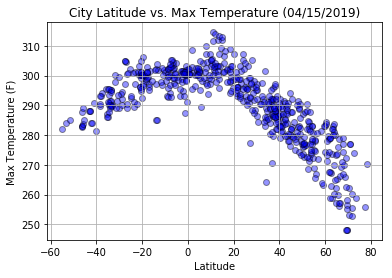

In [8]:
#Design the scatter plot
city_lat = data["Lat"]
max_temp = data["Max Temp"]

plt.scatter(city_lat, max_temp,marker="o", facecolors="blue", edgecolors="black", alpha=0.42)

#Create title and labels
plt.title(f"City Latitude vs. Max Temperature (04/15/2019)")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#Save an image of the chart
plt.savefig("../Images/lat_max_temp_scatter_plot.png")
plt.show()


#### Latitude vs. Humidity Plot

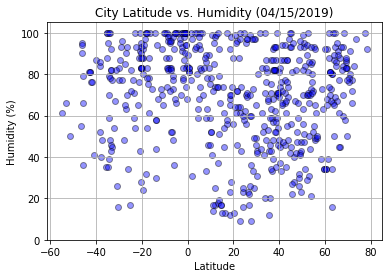

In [9]:
#Design the scatter plot
city_lat = data["Lat"]
humid_data = data["Humidity"]


plt.scatter(city_lat, humid_data,marker="o", facecolors="blue", edgecolors="black", alpha=0.42)

#Create title and labels
plt.title("City Latitude vs. Humidity (04/15/2019)")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 105)
plt.grid()

#Save an image of the chart
plt.savefig("../Images/lat_humid_scatter_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

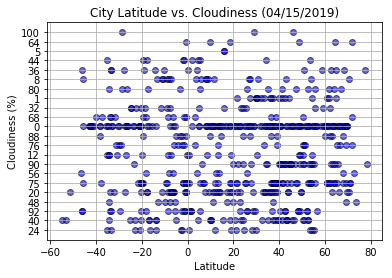

In [14]:
#Design the scatter plot
city_lat = data["Lat"]
cloud_data = data["Cloudiness"]


plt.scatter(city_lat, cloud_data, marker="o", facecolors="blue", edgecolors="black", alpha=0.6)

#Create title and labels
plt.title("City Latitude vs. Cloudiness (04/15/2019)")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#Save an image of the chart
plt.savefig("../Images/lat_cloud_scatter_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

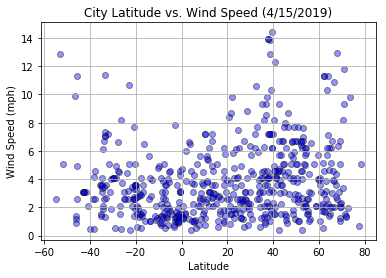

In [12]:
#Design the scatter plot
city_lat = data["Lat"]
wind_speed_data = data["Wind Speed"]


plt.scatter(city_lat, wind_speed_data,marker="o", facecolors="blue", edgecolors="black", alpha=0.42)

#Create title and labels
plt.title("City Latitude vs. Wind Speed (4/15/2019)")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#Save an image of the chart
plt.savefig("../Images/lat_wind_speed_scatter_plot.png")
plt.show()